In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
print(f"pandas  version = {pd.__version__}")
print(f"numpy   version = {np.__version__}")
print(f"seaborn version = {sns.__version__}")

pandas  version = 1.3.5
numpy   version = 1.21.4
seaborn version = 0.11.2


In [3]:
df = pd.read_csv('D:\Python Analysis\LogisticRegression\owid-covid-data.csv')
df

iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   
...         ...       ...          ...         ...          ...        ...   
153625      ZWE    Africa     Zimbabwe  2022-01-06     220178.0     1121.0   
153626      ZWE    Africa     Zimbabwe  2022-01-07     221282.0     1104.0   
153627      ZWE    Africa     Zimbabwe  2022-01-08     221918.0      636.0   
153628      ZWE    Africa     Zimbabwe  2022-01-09     221918.0        0.0   
153629      ZWE    Africa     Zimbabwe  2022-01-10     223000.0     1082.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         NaN                  NaN   
1                      NaN           NaN         NaN                  NaN   
2                      NaN           NaN         NaN                  NaN   
3                      NaN           NaN         NaN                  NaN   
4                      NaN           NaN         NaN                  NaN   
...                    ...           ...         ...                  ...   
153625            1207.143        5108.0        16.0               15.857   
153626            1146.286        5136.0        28.0               18.857   
153627            1100.571        5148.0        12.0               18.714   
153628            1100.571        5148.0         0.0               18.714   
153629             987.571        5180.0        32.0               19.000   

        ...  female_smokers  male_smokers  handwashing_facilities  \
0       ...             NaN           NaN                  37.746   
1       ...             NaN           NaN                  37.746   
2       ...             NaN           NaN                  37.746   
3       ...             NaN           NaN                  37.746   
4       ...             NaN           NaN                  37.746   
...     ...             ...           ...                     ...   
153625  ...             1.6          30.7                  36.791   
153626  ...             1.6          30.7                  36.791   
153627  ...             1.6          30.7                  36.791   
153628  ...             1.6          30.7                  36.791   
153629  ...             1.6          30.7                  36.791   

        hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                              0.5            64.83                    0.511   
1                              0.5            64.83                    0.511   
2                              0.5            64.83                    0.511   
3                              0.5            64.83                    0.511   
4                              0.5            64.83                    0.511   
...                            ...              ...                      ...   
153625                         1.7            61.49                    0.571   
153626                         1.7            61.49                    0.571   
153627                         1.7            61.49                    0.571   
153628                         1.7            61.49                    0.571   
153629                         1.7            61.49                    0.571   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                                        NaN                          NaN   
3                                        NaN   

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153630 entries, 0 to 153629
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    153630 non-null  object 
 1   continent                                   144376 non-null  object 
 2   location                                    153630 non-null  object 
 3   date                                        153630 non-null  object 
 4   total_cases                                 150978 non-null  float64
 5   new_cases                                   150903 non-null  float64
 6   new_cases_smoothed                          149752 non-null  float64
 7   total_deaths                                133709 non-null  float64
 8   new_deaths                                  133870 non-null  float64
 9   new_deaths_smoothed                         133738 non-null  float64
 

In [5]:
#Save model to .csv
#data1.to_csv('D:/Face Detection/Datanew/data1.csv')
#data = df.loc[:,['date','location','total_cases','new_cases','total_deaths','life_expectancy','gdp_per_capita']].dropna() #คำสั่ง .loc ใช้เลือกข้อมูลบางคอลัมน์
#data.groupby('location').count()

data = df.loc[:,['total_cases','location']].dropna() #คำสั่ง .loc ใช้เลือกข้อมูลบางคอลัมน์
data

total_cases     location
0               5.0  Afghanistan
1               5.0  Afghanistan
2               5.0  Afghanistan
3               5.0  Afghanistan
4               5.0  Afghanistan
...             ...          ...
153625     220178.0     Zimbabwe
153626     221282.0     Zimbabwe
153627     221918.0     Zimbabwe
153628     221918.0     Zimbabwe
153629     223000.0     Zimbabwe

[150978 rows x 2 columns]

In [6]:
# 10 Countries in AEC
#AEC = data.loc[data['location'].isin(['Singapore','Indonesia','Thailand','Myanmar','Vietnam','Brunei','Laos','Cambodia','Malaysia','Philippines'])] #.set_index('location') #.reset_index() 

# 10 Countries in AEC
AEC = data.loc[data['location'].isin(['Thailand','Myanmar'])] #.set_index('location') #.reset_index() 
AEC

total_cases  location
96450           8.0   Myanmar
96451           8.0   Myanmar
96452          10.0   Myanmar
96453          14.0   Myanmar
96454          15.0   Myanmar
...             ...       ...
137708    2245250.0  Thailand
137709    2252776.0  Thailand
137710    2261039.0  Thailand
137711    2269550.0  Thailand
137712    2277476.0  Thailand

[1375 rows x 2 columns]

In [7]:
from sklearn.preprocessing import LabelEncoder

y_le = LabelEncoder()
y = y_le.fit_transform(AEC.location)
AEC['country'] = y
AEC

C:\Users\TECHAT~1\AppData\Local\Temp/ipykernel_12972/123990762.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AEC['country'] = y


total_cases  location  country
96450           8.0   Myanmar        0
96451           8.0   Myanmar        0
96452          10.0   Myanmar        0
96453          14.0   Myanmar        0
96454          15.0   Myanmar        0
...             ...       ...      ...
137708    2245250.0  Thailand        1
137709    2252776.0  Thailand        1
137710    2261039.0  Thailand        1
137711    2269550.0  Thailand        1
137712    2277476.0  Thailand        1

[1375 rows x 3 columns]

In [13]:
df = AEC.loc[:,['total_cases','country']].dropna().reset_index() #คำสั่ง .loc ใช้เลือกข้อมูลบางคอลัมน์
t = df.drop(['index'], axis=1) #ลบคอลัมน์
t

total_cases  country
0             8.0        0
1             8.0        0
2            10.0        0
3            14.0        0
4            15.0        0
...           ...      ...
1370    2245250.0        1
1371    2252776.0        1
1372    2261039.0        1
1373    2269550.0        1
1374    2277476.0        1

[1375 rows x 2 columns]

<AxesSubplot:xlabel='total_cases', ylabel='country'>

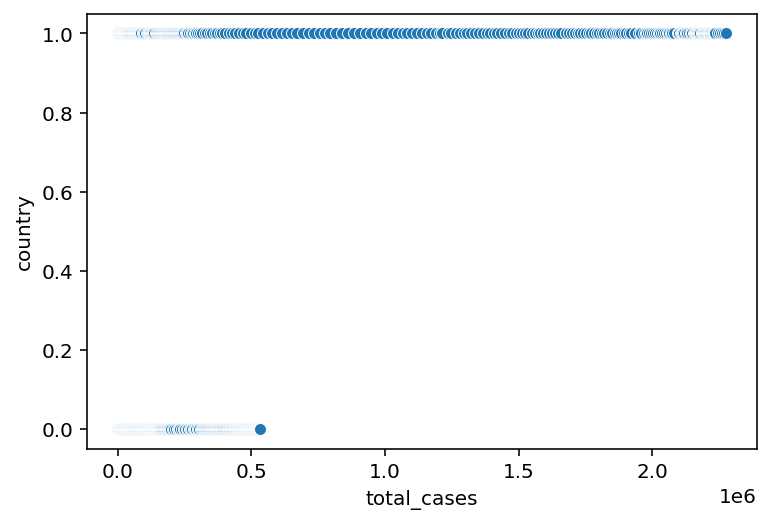

In [14]:
sns.scatterplot(data=t, x='total_cases', y='country')

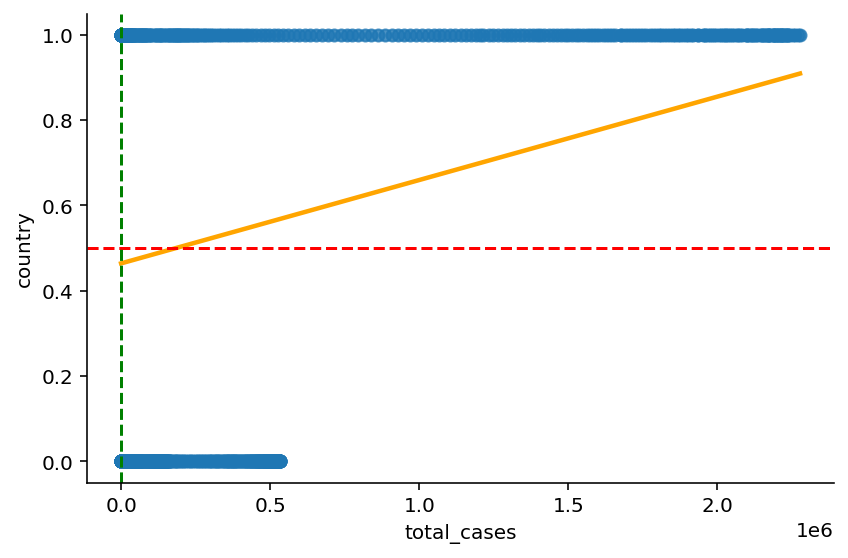

In [15]:
sns.lmplot(x='total_cases', y='country', data=t,
           logistic=False, ci=None, height=4, aspect=1.5,
           line_kws={'color': 'orange'})
plt.axhline(.5, color='red', linestyle='--')
plt.axvline(2.7, color='green', linestyle='--');

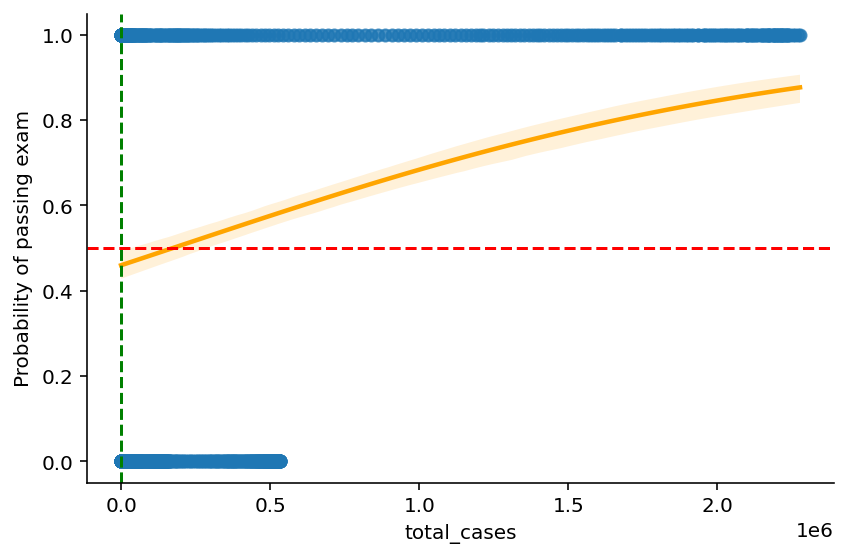

In [16]:
sns.lmplot(x='total_cases', y='country', data=t,
           logistic=True, height=4, aspect=1.5, 
           line_kws={'color': 'orange'})
plt.ylabel('Probability of passing exam')
plt.axvline(2.71, color='green', linestyle='--')
plt.axhline(.5, color='red', linestyle='--');

In [20]:
t.T

0     1     2     3     4     5     6     7     8     9     ...  \
total_cases   8.0   8.0  10.0  14.0  15.0  15.0  20.0  20.0  21.0  21.0  ...   
country       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

                  1365       1366       1367       1368       1369       1370  \
total_cases  2226446.0  2229558.0  2232485.0  2235576.0  2235576.0  2245250.0   
country            1.0        1.0        1.0        1.0        1.0        1.0   

                  1371       1372       1373       1374  
total_cases  2252776.0  2261039.0  2269550.0  2277476.0  
country            1.0        1.0        1.0        1.0  

[2 rows x 1375 columns]

## statsmodels

In [21]:
from patsy import dmatrices
import statsmodels.api as sm

In [22]:
y, X = dmatrices('country ~ total_cases', data=t, return_type = 'dataframe')

In [23]:
print('ข้อมูล X:',X, '\nข้อมูล y:',y)

ข้อมูล X:       Intercept  total_cases
0           1.0          8.0
1           1.0          8.0
2           1.0         10.0
3           1.0         14.0
4           1.0         15.0
...         ...          ...
1370        1.0    2245250.0
1371        1.0    2252776.0
1372        1.0    2261039.0
1373        1.0    2269550.0
1374        1.0    2277476.0

[1375 rows x 2 columns] 
ข้อมูล y:       country
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
...       ...
1370      1.0
1371      1.0
1372      1.0
1373      1.0
1374      1.0

[1375 rows x 1 columns]


## การพยากรณ์โมเดล Logistic Regression

In [24]:
#https://en.wikipedia.org/wiki/Logistic_regression
model = sm.Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.665973
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                country   No. Observations:                 1375
Model:                          Logit   Df Residuals:                     1373
Method:                           MLE   Df Model:                            1
Date:                Wed, 12 Jan 2022   Pseudo R-squ.:                 0.03765
Time:                        13:51:31   Log-Likelihood:                -915.71
converged:                       True   LL-Null:                       -951.54
Covariance Type:            nonrobust   LLR p-value:                 2.562e-17
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.1613      0.062     -2.588      0.010      -0.283      -0.039
total_cases   9.33e-07   1.25e-07      7.493      0.000    6.89e-07    1.18e-06
===============================================================================
"""

In [25]:
## การพยากรณ์
# ถ้า 0-0.44 พยากรณ์ว่าเป็นประเทศพม่า
# ถ้า 0.5-1.0 พยากรณ์ว่าเป็นประเทศไทย

model.predict(X)

0       0.459772
1       0.459772
2       0.459772
3       0.459773
4       0.459773
          ...   
1370    0.873637
1371    0.874410
1372    0.875254
1373    0.876119
1374    0.876919
Length: 1375, dtype: float64

In [26]:
#การใช้ lambda และ if ปัดตัวเลขให้เป็น 0,1 คือ 0 = พม่า 1 = ไทย

model.predict(X).apply(lambda p: 0 if p < .5 else 1)

0       0
1       0
2       0
3       0
4       0
       ..
1370    1
1371    1
1372    1
1373    1
1374    1
Length: 1375, dtype: int64

In [27]:
#การเรียกว่าดูค่า coef:ค่าสัมประสิทธิ์ถดถอยของ intercept และ total_cases
model.params

Intercept     -1.612688e-01
total_cases    9.329807e-07
dtype: float64

In [28]:
#การเรียกว่าดูค่า coef:ค่าสัมประสิทธิ์ถดถอยของ intercept ตัวเดียว
model.params['Intercept']

-0.16126882221242783

In [29]:
#การเรียกว่าดูค่า coef:ค่าสัมประสิทธิ์ถดถอยของ intercept ตัวเดียว โดยกำหนด index[0]
model.params[0]

-0.16126882221242783

In [30]:
#การเรียกว่าดูค่า coef:ค่าสัมประสิทธิ์ถดถอยของ total_cases ตัวเดียว
model.params['total_cases']

9.329807005968279e-07

In [31]:
t

total_cases  country
0             8.0        0
1             8.0        0
2            10.0        0
3            14.0        0
4            15.0        0
...           ...      ...
1370    2245250.0        1
1371    2252776.0        1
1372    2261039.0        1
1373    2269550.0        1
1374    2277476.0        1

[1375 rows x 2 columns]

In [32]:
t['predicted']=model.predict(X).apply(lambda p: 0 if p < .5 else 1)
t

total_cases  country  predicted
0             8.0        0          0
1             8.0        0          0
2            10.0        0          0
3            14.0        0          0
4            15.0        0          0
...           ...      ...        ...
1370    2245250.0        1          1
1371    2252776.0        1          1
1372    2261039.0        1          1
1373    2269550.0        1          1
1374    2277476.0        1          1

[1375 rows x 3 columns]

In [35]:
#การคำนวณหาค่า log_odds, odds, และ prob
#odds คือโอกาสของการเกิดเหตุการณ์ (มีปัจจัย)

t['log_odds']=model.params['Intercept']+model.params['total_cases']*t['total_cases']
t['odds']=np.exp(model.params['Intercept']+model.params['total_cases']*t['total_cases'])
t['prob']=model.predict(X)
t

total_cases  country  predicted  log_odds      odds      prob
0             8.0        0          0 -0.161261  0.851070  0.459772
1             8.0        0          0 -0.161261  0.851070  0.459772
2            10.0        0          0 -0.161259  0.851071  0.459772
3            14.0        0          0 -0.161256  0.851074  0.459773
4            15.0        0          0 -0.161255  0.851075  0.459773
...           ...      ...        ...       ...       ...       ...
1370    2245250.0        1          1  1.933506  6.913708  0.873637
1371    2252776.0        1          1  1.940528  6.962424  0.874410
1372    2261039.0        1          1  1.948237  7.016306  0.875254
1373    2269550.0        1          1  1.956178  7.072242  0.876119
1374    2277476.0        1          1  1.963572  7.124734  0.876919

[1375 rows x 6 columns]

## การประเมินโมเดลด้วย confusion matrix
$$
\begin{bmatrix}
C_{0,0} & C_{0,1} \\
C_{1,0} & C_{1,1}
\end{bmatrix}
=
\begin{bmatrix}
tp&fn (Type II Error) \\
fp (Type I Error)&tn
\end{bmatrix}
$$

In [36]:
# การประเมินโมเดลด้วย Confustion Matrix
# 0 = พม่า (หรือโควิด-19 คือติดเชื้อโอไมครอน)
# 1 = ไทย (หรือปกติ คือไม่ติดเชื้อโอไมครอน)

#              predicted:
#              ข้อมูลยากรณ์
#               0       1
# Actual:  0 [[(0,0)  (0,1)]
# ข้อมูลจริง  1  [(1,0)  (1,1)]]


model.pred_table()
# 0: 467+188 = 655
# 1: 500+220 = 720

array([[467., 188.],
       [500., 220.]])

In [37]:
tn, fp, fn, tp = model.pred_table().ravel()

In [38]:
print(f'tn = {tn}')
print(f'fp = {fp}')
print(f'fn = {fn}')
print(f'tp = {tp}')

tn = 467.0
fp = 188.0
fn = 500.0
tp = 220.0


$$\mathrm {Accuracy}={\frac {\mathrm {TP} +\mathrm {TN} }{\mathrm {TP} +\mathrm {TN} +\mathrm {FP} +\mathrm {FN} }}$$

In [40]:
#โมเดลมีความแม่นยำ = 0.50

t = (tp+tn)/(tp+tn+fp+fn)
t #.round(2)

0.49963636363636366